In [23]:
"""This is demo 2"""

# with ref : https://gist.github.com/Orbifold/c6ede989b41e847700f0e0ea2724f066
# src code : 
# https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Epoch : 0050 cost=5.421173573 W= 0.399396 b= -0.334559


Epoch : 0100 cost=4.458222866 W= 0.369833 b= -0.115797


Epoch : 0150 cost=3.828669548 W= 0.345936 b= 0.0610315


Epoch : 0200 cost=3.417024136 W= 0.32662 b= 0.203966


Epoch : 0250 cost=3.147814512 W= 0.311006 b= 0.319502


Epoch : 0300 cost=2.971716404 W= 0.298385 b= 0.412893


Epoch : 0350 cost=2.856494904 W= 0.288183 b= 0.488382


Epoch : 0400 cost=2.781080484 W= 0.279937 b= 0.549401


Epoch : 0450 cost=2.731700897 W= 0.273272 b= 0.598723


Epoch : 0500 cost=2.699350595 W= 0.267884 b= 0.638592


Epoch : 0550 cost=2.678143263 W= 0.263529 b= 0.670819


Epoch : 0600 cost=2.664231062 W= 0.260008 b= 0.696869


Epoch : 0650 cost=2.655095577 W= 0.257163 b= 0.717925


Epoch : 0700 cost=2.649090767 W= 0.254863 b= 0.734946


Epoch : 0750 cost=2.645136833 W= 0.253003 b= 0.748704


Epoch : 0800 cost=2.642529726 W= 0.251501 b= 0.759825


Epoch : 0850 cost=2.640807152 W= 0.250286 b= 0.768814


Epoch : 0900 cost=2.639665842 W= 0.249304 b= 0.776079


Epoch : 0950 cost=2.638907433 W= 0.24851 b= 0.781953


Epoch : 1000 cost=2.638401747 W= 0.247869 b= 0.7867
optimization finished!
training_cost=2.638401747 W= 0.247869 b= 0.7867


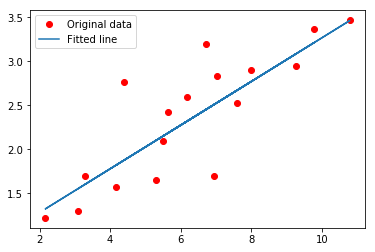

Testing...
Testing cost :  1.29359
Absolute mean square diff :  

1.34482


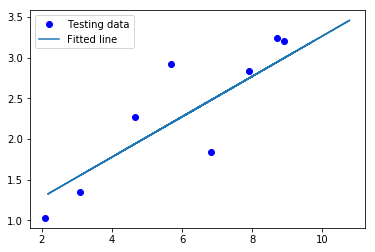

In [24]:
X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]

epochs = 1000
learning_rate = .001
display_step = 50

train_X = np.array(X)
train_Y = np.array(Y)

# tf Graph inputs
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# model weights
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

prediction = tf.add(tf.multiply(W, X), b)  # mx + b
cost = tf.reduce_mean(tf.reduce_sum(tf.square(prediction - Y)))  # SSE

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)  # gradient descent

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for x, y in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})  # training happens here

        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print('Epoch : %04d' % (epoch + 1), 'cost={:.9f}'.format(c), 'W=', sess.run(W), 'b=', sess.run(b))

    print('optimization finished!')
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print('training_cost={:.9f}'.format(training_cost), 'W=', sess.run(W), 'b=', sess.run(b))

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # # testing
    # # when,
    # X = [8.324]
    # Y = tf.add(tf.multiply(W, X), b)  # mx + b
    # print('Y is : ', sess.run(Y))   # Y is :  [ 2.84843016]
    # it's working fine

    # Testing example, as requested (Issue #2)
    print('Testing...')
    test_X = np.array([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = np.array([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])
    testing_cost = sess.run(cost, feed_dict={X: test_X, Y: test_Y})
    print('Testing cost : ', testing_cost)
    print('Absolute mean square diff : ', abs(training_cost - testing_cost))
    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
